# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Dylan Eggemeyer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Question 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [2]:
import pickle
import requests

article_page = requests.get('https://www.arrowheadpride.com/2022/11/8/23447290/chiefs-film-review-kadarius-toney-provides-glimpses-of-speed-and-athleticism')
article_html = article_page.text

with open('chiefs-article.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)


### Question 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [72]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup

with open('chiefs-article.pkl', 'rb') as f:
    article_html = pickle.load(f)

parser = 'html.parser'
soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')
article = nlp(article_element.get_text().lower())

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

pol = article._.polarity

sentences = list(article.sents)
count = 0
for sentence in sentences:
    count += 1
    
print('The polarity score of the article is:',pol)
print('The number of sentences in the original article is:',count)

The polarity score of the article is: 0.17368301660674546
The number of sentences in the original article is: 53


### Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [47]:
from collections import Counter

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in article if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))

print('The five most common tokens are:', word_freq.most_common(5))

The five most common tokens are: [('toney', 24), ('chiefs', 15), ('kansas', 9), ('city', 9), ('play', 9)]


### Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [48]:
interesting_lemmas = [token.lemma_ for token in article if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print('The five most common lemmas are:', lemma_freq.most_common(5))

The five most common lemmas are: [('toney', 24), ('play', 17), ('chief', 15), ('receiver', 10), ('kansas', 9)]


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

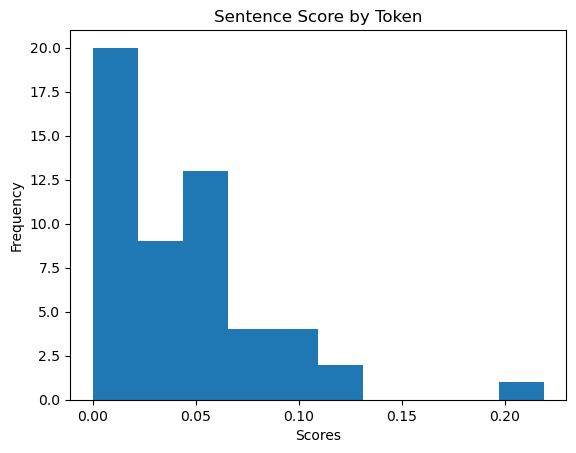

In [61]:
def wordCount(sentence):
    word_count = 0
    for word in sentence:
        if not(word.is_space or word.is_punct):
            word_count += 1
    return word_count

def score_sentence_by_token(sentence, list_interesting_tokens):
    if wordCount(sentence) == 0:
        return 0
    if len(list_interesting_tokens) == 0:
        return 0
    count = 0
    for token in sentence:
        if str(token).lower() in list_interesting_tokens:
            count += 1
    total = wordCount(sentence)
    return count/total

sentenceIndex = 0
sentences = list(article.sents)
token_score_list = list()
top_tokens = list()

for i in word_freq.most_common(5):
    top_tokens.append(i[0])

for i in range(len(sentences)):
    token_score_list.append(score_sentence_by_token(sentences[i],top_tokens))

import matplotlib.pyplot as plt

x = token_score_list

plt.hist(x)
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.title("Sentence Score by Token")
plt.show()



# The most common score seems to be 0

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

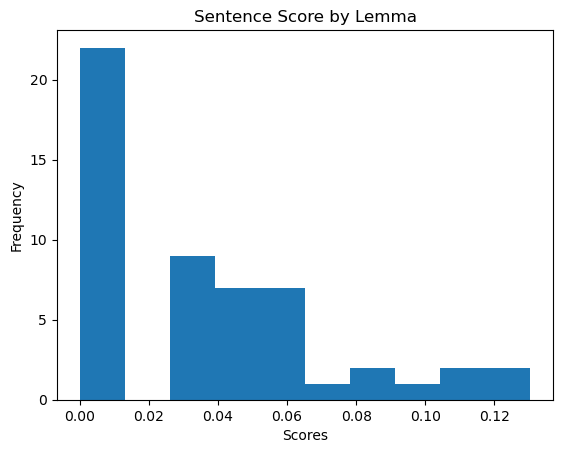

In [63]:
def wordCount(sentence):
    word_count = 0
    for word in sentence:
        if not(word.is_space or word.is_punct):
            word_count += 1
    return word_count

def score_sentence_by_lemma(sentence, list_interesting_lemmas):
    if wordCount(sentence) == 0:
        return 0
    if len(list_interesting_lemmas) == 0:
        return 0
    count = 0
    for token in sentence:
        if str(token).lower() in list_interesting_lemmas:
            count += 1
    total = wordCount(sentence)
    return count/total

sentenceIndex = 0
sentences = list(article.sents)
lemma_score_list = list()
top_lemmas = list()

for i in lemma_freq.most_common(5):
    top_lemmas.append(i[0])

for i in range(len(sentences)):
    lemma_score_list.append(score_sentence_by_lemma(sentences[i],top_lemmas))

import matplotlib.pyplot as plt

x = lemma_score_list

plt.hist(x)
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.title("Sentence Score by Lemma")
plt.show()



# The most common score seems to be 0

### Question 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.055
* Cutoff Score (lemmas): 0.045

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [83]:
sentence_list = list()

for sent in list(article.sents):
    if score_sentence_by_token(sent, top_tokens) >= .055:
        sentence_list.append(sent.text.strip())
token_summary = ' '.join(sentence_list)
print(token_summary)

kansas city chiefs analysis





film review: kadarius toney provides glimpses of why chiefs traded for him

in sunday’s small sample kansas city’s shifty new wide receiver displayed some rare quickness. by
      
bryanstewart



  nov  8, 2022,  2:00pm cst







      / 
new











share this story




share this on facebook





share this on twitter








share
all sharing options






share
all sharing options for:
film review: kadarius toney provides glimpses of why chiefs traded for him












reddit







pocket









flipboard





email




















denny medley-usa today sports




before entering their week 8 bye, the kansas city chiefs traded two 2023 draft picks — a compensatory third-rounder and a sixth-rounder — for former new york giants wide receiver kadarius toney, whom new york had selected 20th overall in the 2021 nfl draft. during week 9’s sunday night football matchup against the tennessee titans, kansas city’s offensive coaches wasted no t

### Question 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [84]:
pol = nlp(token_summary)._.polarity

sentences = list(nlp(token_summary).sents)
count = 0
for sentence in sentences:
    count += 1
    
print('The polarity score of the article is:',pol)
print('The number of sentences in the original article is:',count)

The polarity score of the article is: 0.19199548393992838
The number of sentences in the original article is: 21


### Question 10

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [90]:
sentence_list = list()

for sent in list(article.sents):
    if score_sentence_by_lemma(sent, top_lemmas) >= .045:
        sentence_list.append(sent.text.strip())
lemma_summary = ' '.join(sentence_list)
print(lemma_summary)

kansas city chiefs analysis





film review: kadarius toney provides glimpses of why chiefs traded for him

in sunday’s small sample kansas city’s shifty new wide receiver displayed some rare quickness. during week 9’s sunday night football matchup against the tennessee titans, kansas city’s offensive coaches wasted no time getting toney on the field — albeit in a very limited role,  with just nine offensive snaps.
let’s see what kind of initial impression toney was able to make. in his biggest highlight snap, head coach andy reid called a play that matched toney against a linebacker in one-on-one coverage. toney can be just one more receiver that kansas city can use to counter against murky, clouded zone defenses near the red zone. the scramble drill
another way toney’s foot quickness and instincts shine is when plays break down. toney thread:there were a couple different plays that showed he really is so quick to transition into the "second play". pic.twitter.com/gwu9zwyxsf— bryan s

### Question 11

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [91]:
pol = nlp(lemma_summary)._.polarity

sentences = list(nlp(lemma_summary).sents)
count = 0
for sentence in sentences:
    count += 1
    
print('The polarity score of the article is:',pol)
print('The number of sentences in the original article is:',count)

The polarity score of the article is: 0.26945366362033035
The number of sentences in the original article is: 16


In [ ]:
The polarity score of the token summary increased but not by much. The polarity score of the lemma summary increased by a lot. I think this 

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The polarity score of the token summary increased but not by much. The polarity score of the lemma summary increased by a lot. I think this could be because the article summaries are more focused on the main content of the article and those could include less of the descriptive words for the receiver.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

I think the summary based on lemmas was the better option. It reduced a lot of noise in the article section but was able to get across the main points of the article. I think it is because the lemmas pull in the most important root words and while sentence structure may call for different version of a word, it always grabs the most important words in the article.